# Tarea 1

## Problema 1

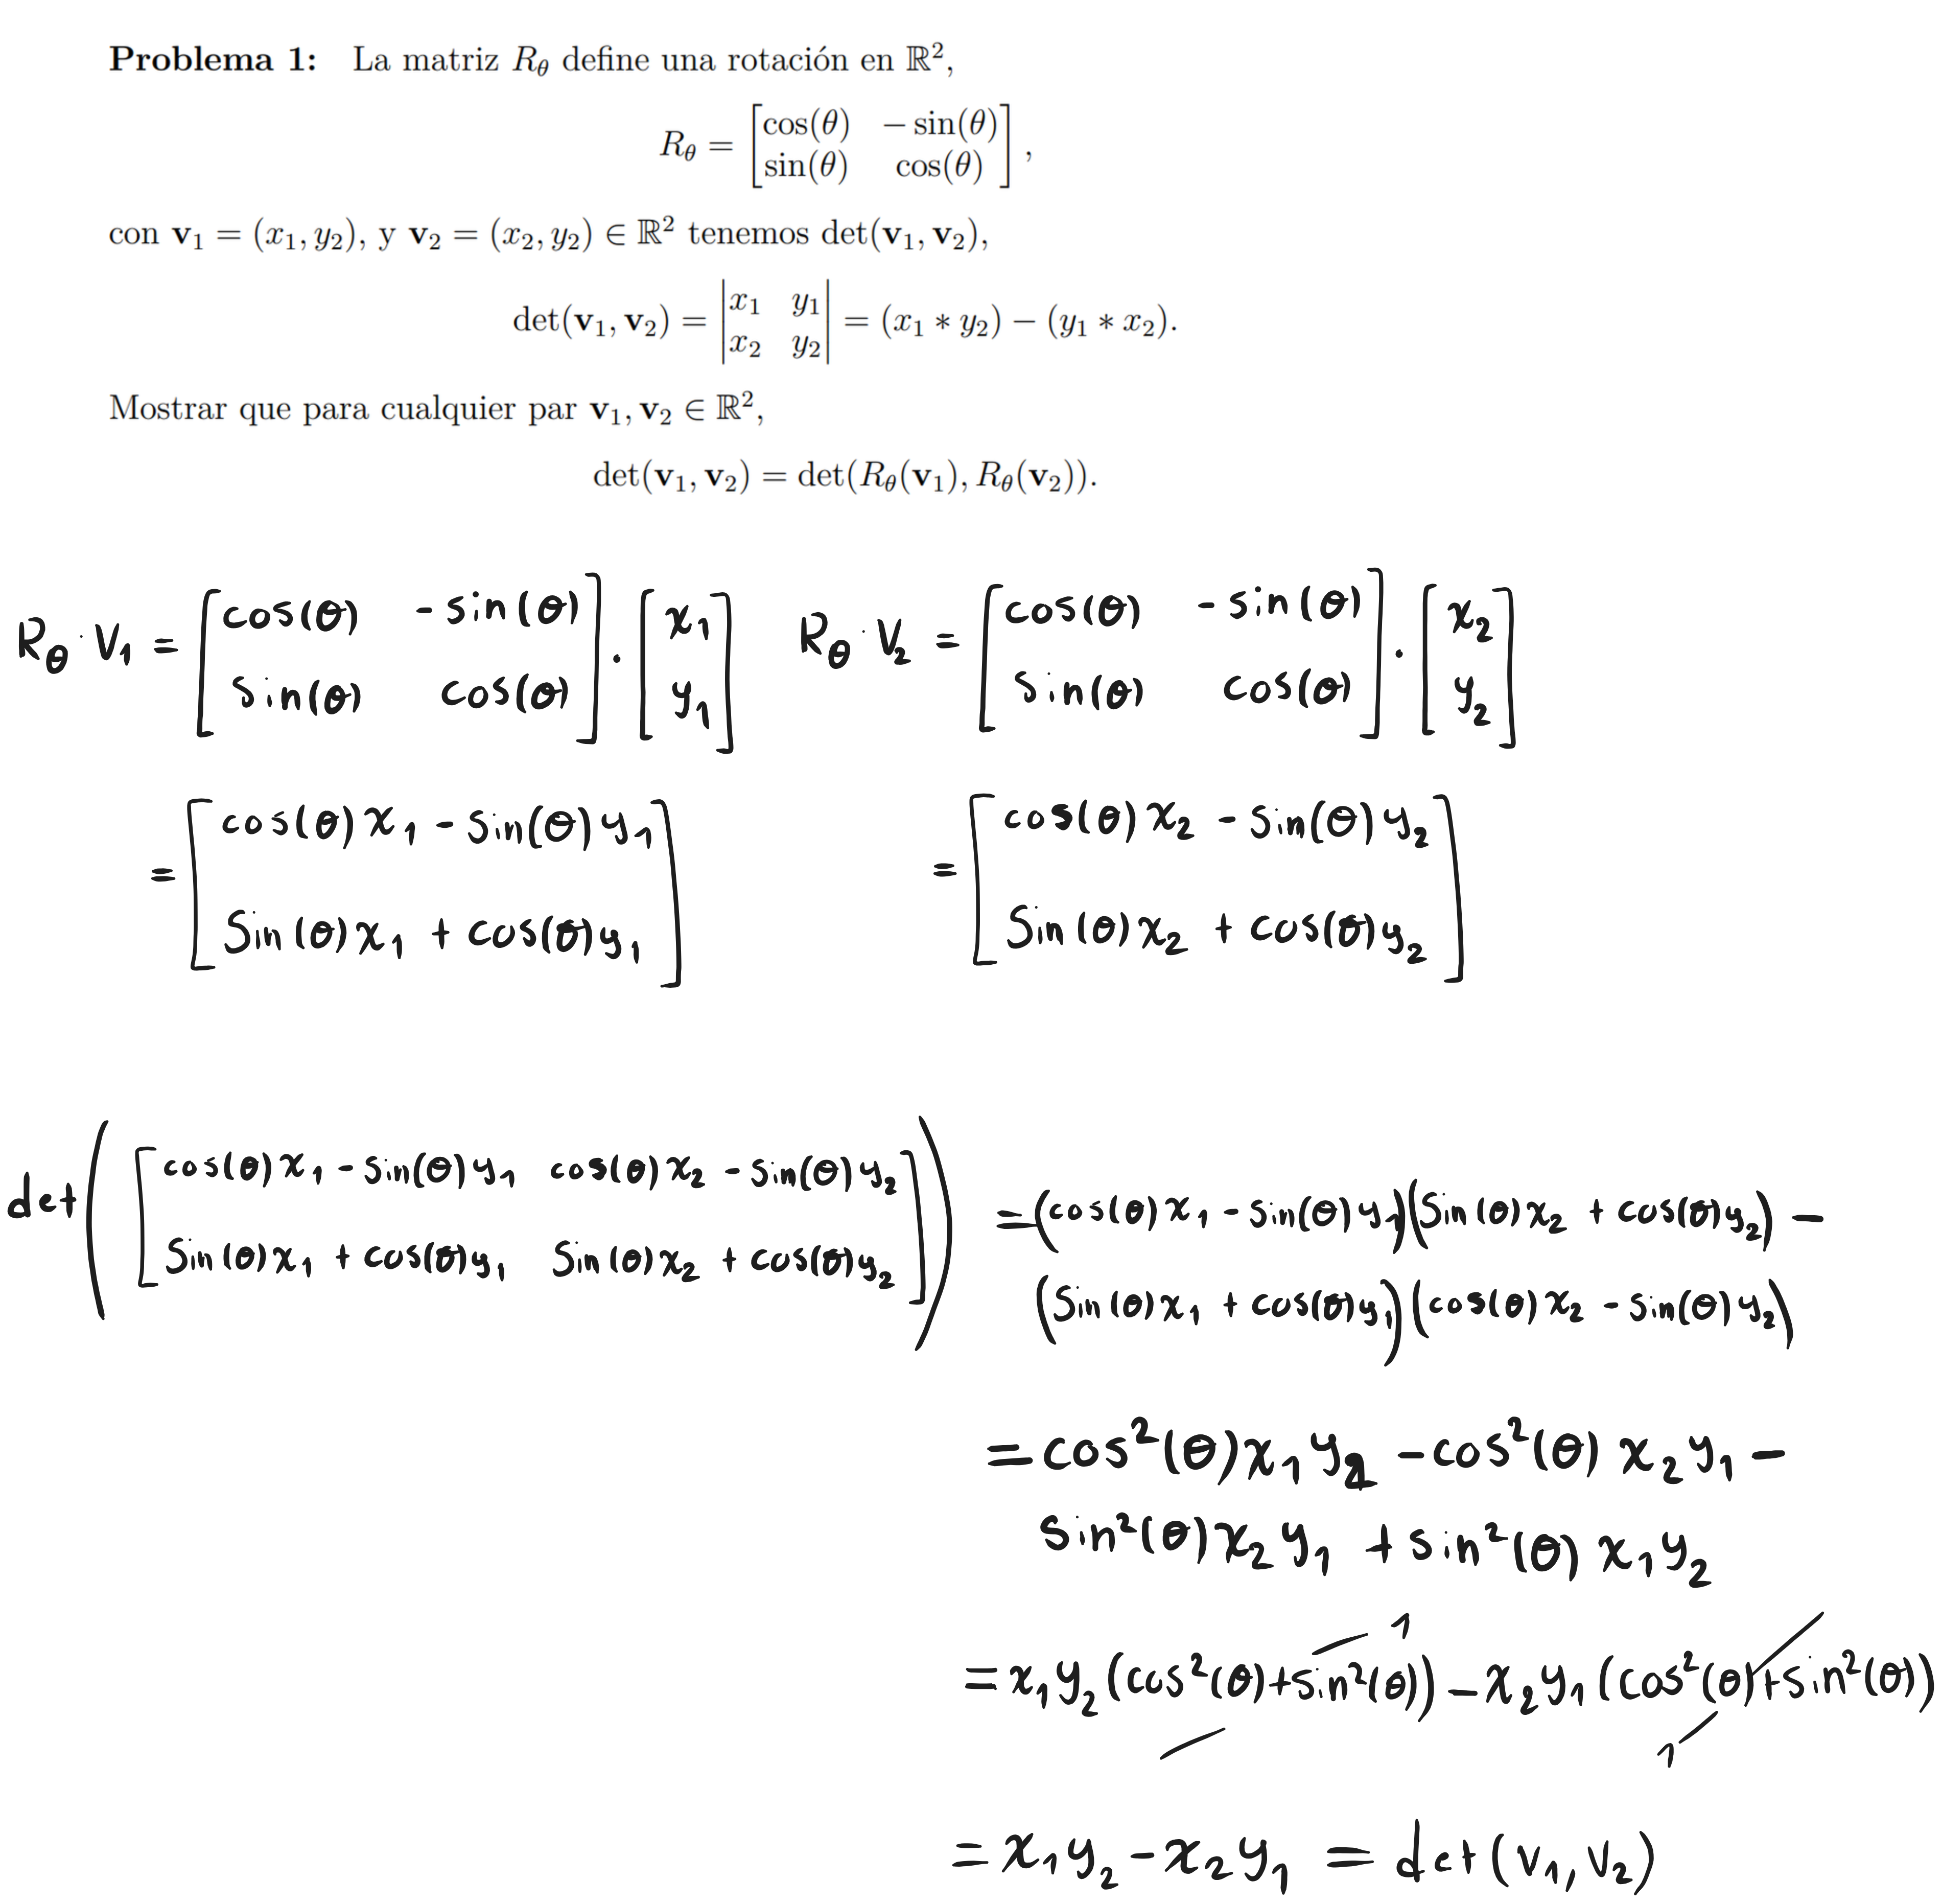

## Problema 2

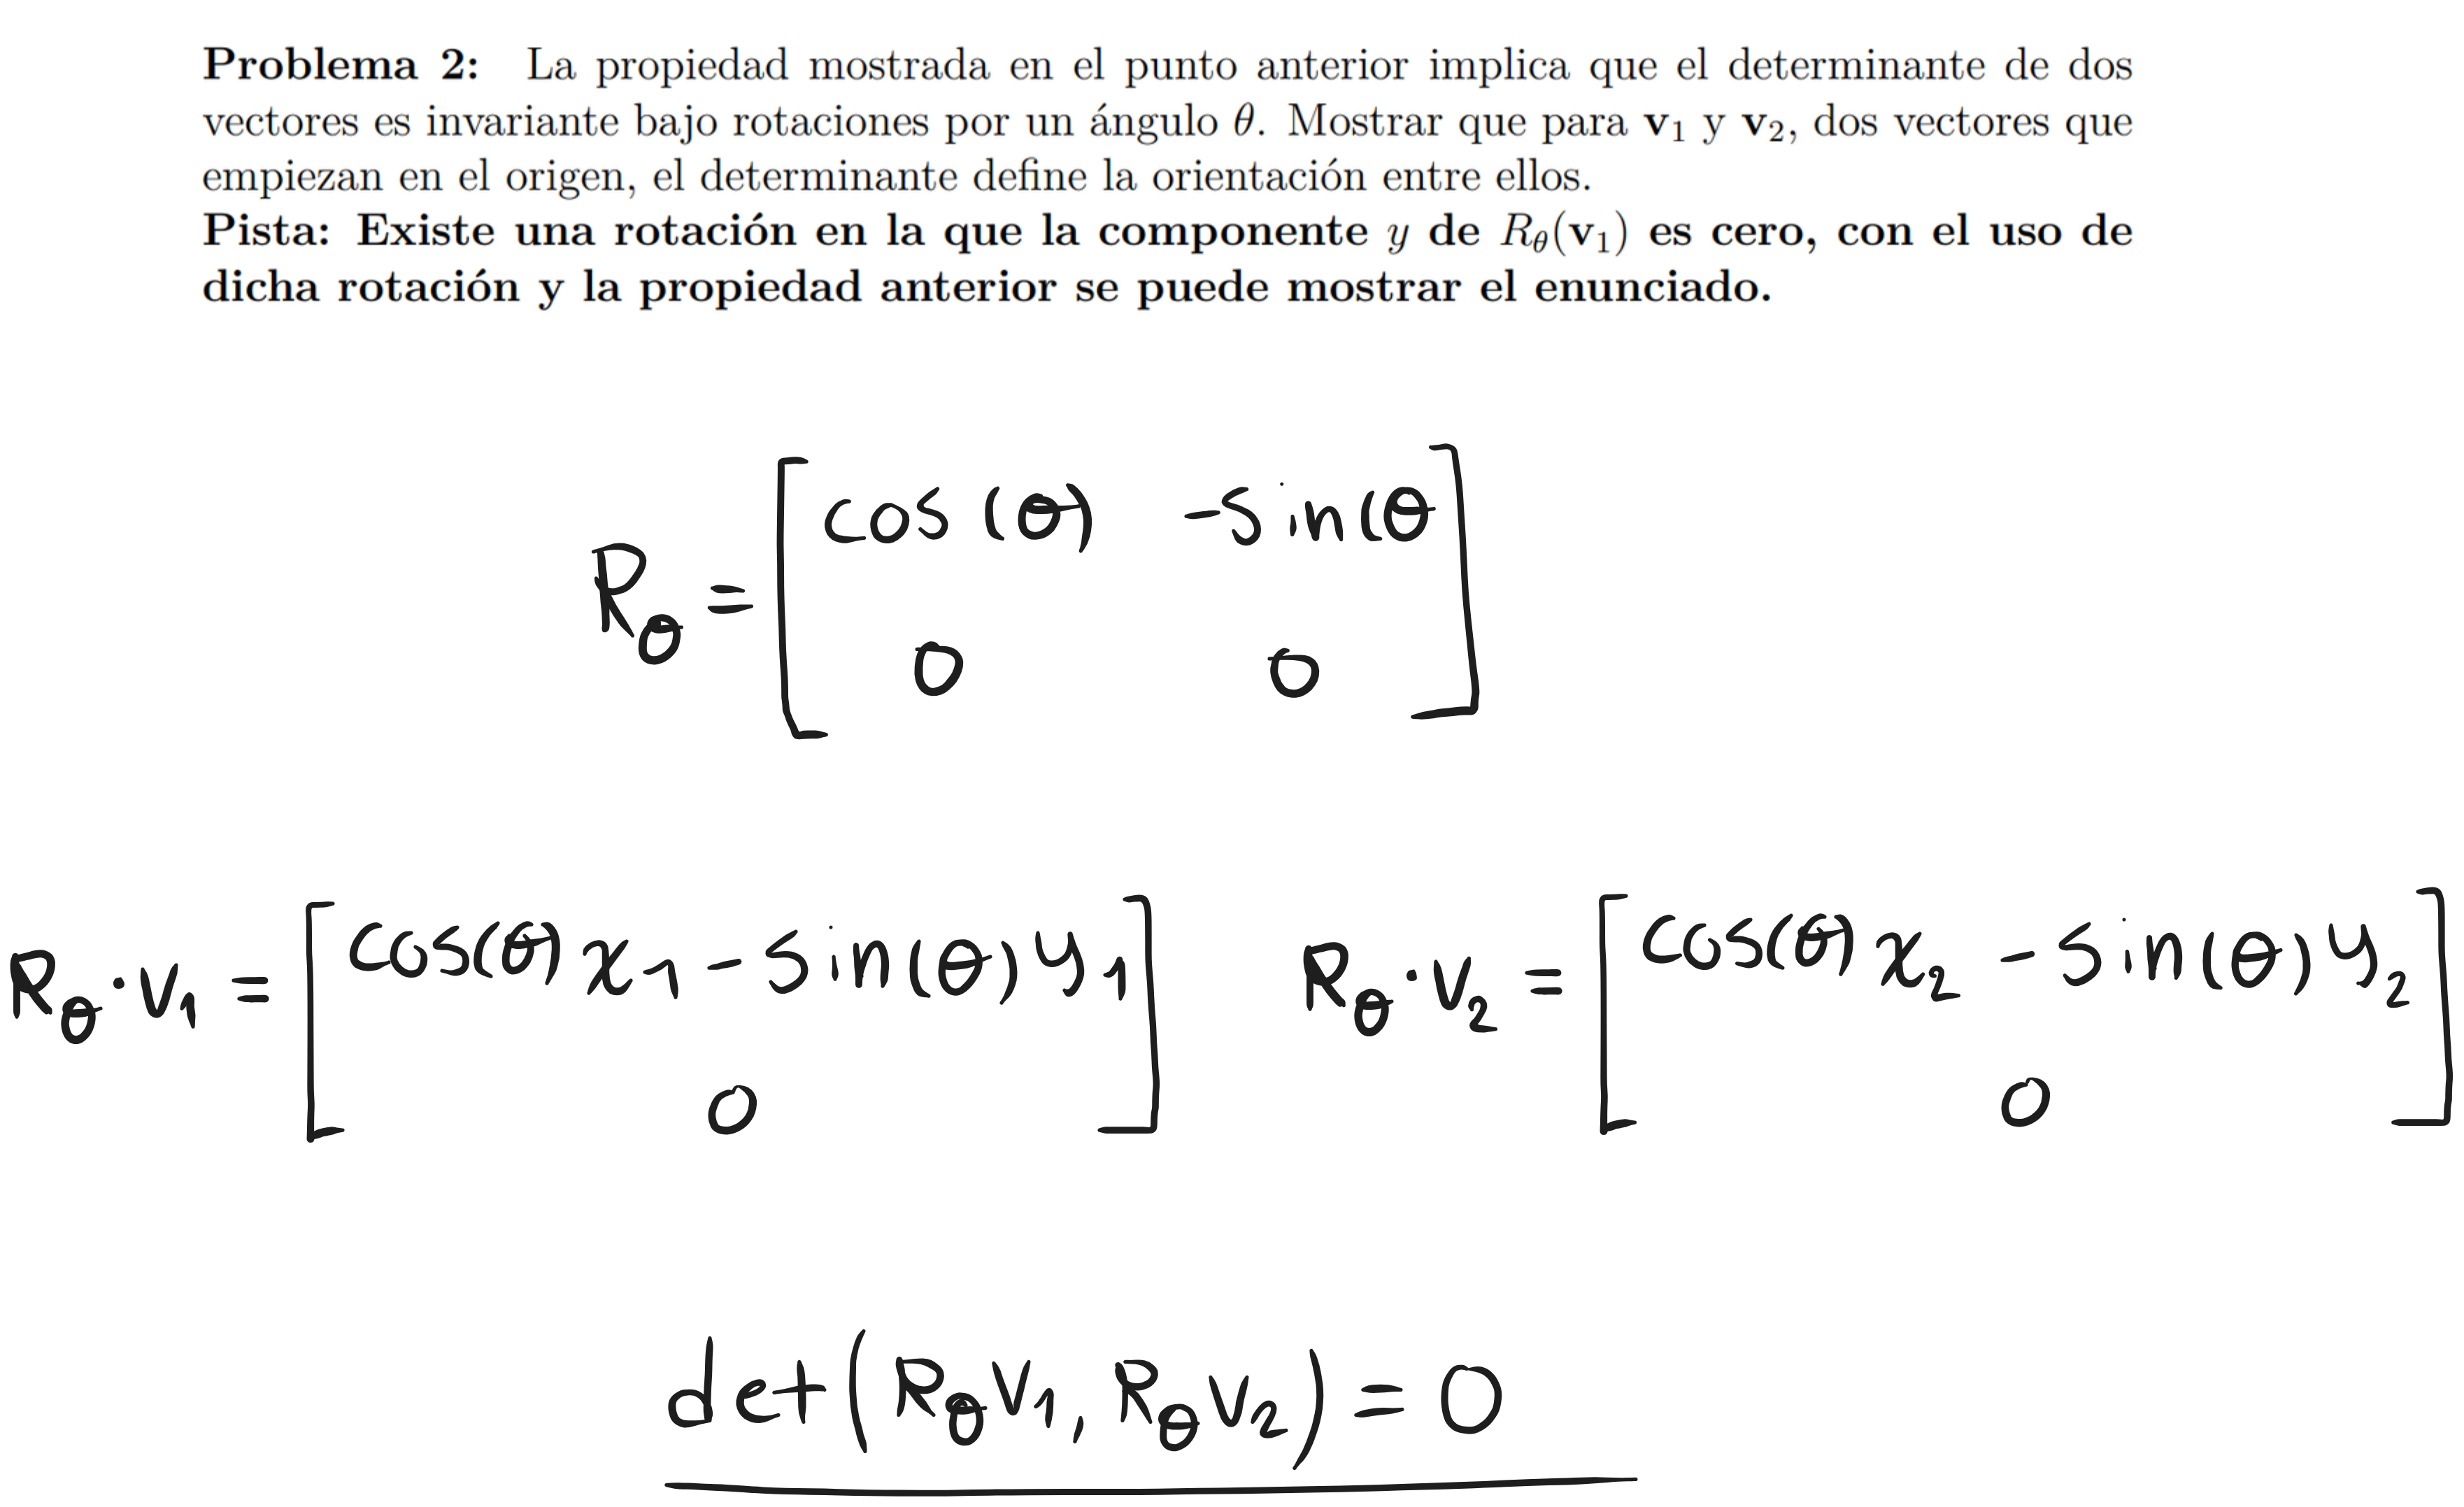

In [1]:
# Utils
def orientation(a, b, c):
    ob = (b[0]-a[0], b[1]-a[1])
    oc = (c[0]-a[0], c[1]-a[1])
    det = ob[0]*oc[1]-ob[1]*oc[0]
    return -1 if det<0 else 1 if det>0 else 0

# Checks if the point b its on the segment ac
def onSegment(a,b,c):
    on_x_proyection = b[0]<=max(a[0],c[0]) and b[0]>= min(a[0],c[0])
    # print(f"pr_x: {on_x_proyection}")
    on_y_proyection = b[1]<=max(a[1],c[1]) and b[1]>= min(a[1],c[1])
    # print(f"pr_y: {on_y_proyection}")
    if(on_x_proyection and on_y_proyection): return True
    return False

def doIntersect(a,b,c,d):
    # Orientations between segment and the other points
    o_c_segment_ab = orientation(a,b,c)
    o_d_segment_ab = orientation(a,b,d)
    o_a_segment_cd = orientation(c,d,a)
    o_b_segment_cd = orientation(c,d,b)

    # Case 1
    if(o_c_segment_ab != o_d_segment_ab and o_a_segment_cd != o_b_segment_cd):
        return True
    
    # Special cases when they are colinear
    # print("Case 1")
    if(o_c_segment_ab == 0 and onSegment(a,c,b)): return True
    # print("Case 2")
    if(o_d_segment_ab == 0 and onSegment(a,d,b)): return True
    # print("Case 3")
    if(o_a_segment_cd == 0 and onSegment(c,a,d)): return True
    # print("Case 4")
    if(o_b_segment_cd == 0 and onSegment(c,b,d)): return True

    return False

## Problema 3

In [2]:
from math import atan2

def get_convex_hull(p):
    n = len(p)
    if n<3: return
    hull = []
    s_y = min(p, key=lambda x: x[1])
    p.sort(key=lambda x: (atan2(x[1]-s_y[1], x[0]-s_y[0]), -x[1], x[0]))
    for point in p:
        while len(hull)>=2 and orientation(hull[-2], hull[-1], point) <= 0:
            hull.pop()
        hull.append(point)
    return hull

## Problema 4

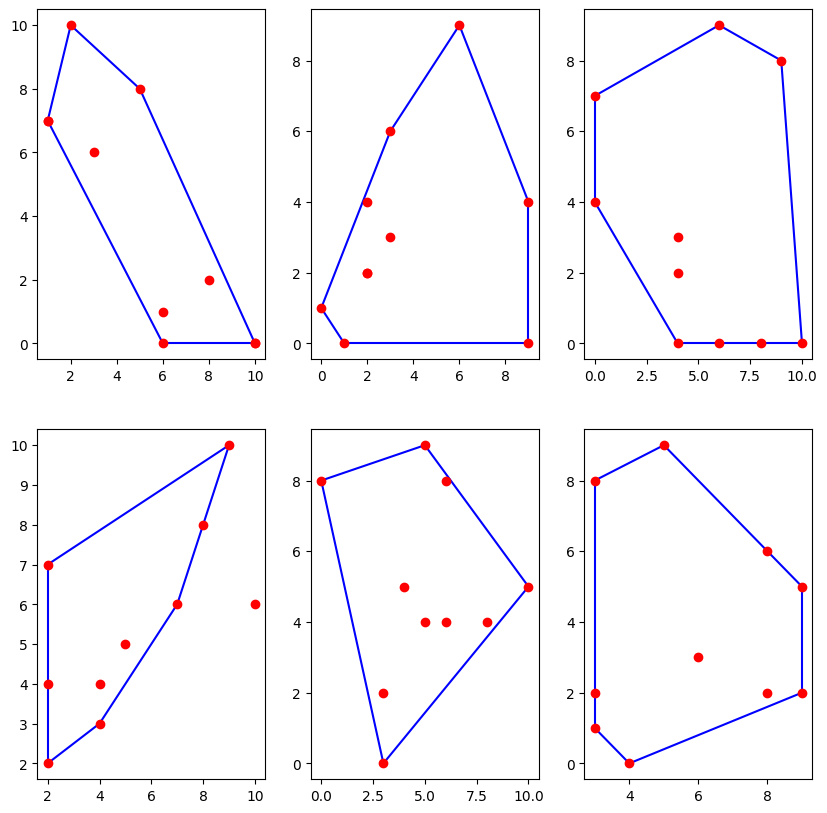

In [4]:
import matplotlib.pyplot as plt
import random as r

fig, ax = plt.subplots(2, 3, figsize=(10, 10))
for i in range(6):
    n = 10
    p = [x for x in zip([r.randint(0,n) for _ in range(n)],[r.randint(0,n) for _ in range(n)])]
    hull = get_convex_hull(p)

    for j in range(len(hull)):
        ax[i//3][i%3].plot([hull[j][0],hull[(j+1)%len(hull)][0]],[hull[j][1],hull[(j+1)%len(hull)][1]],'b')
    for j in range(len(p)):
        ax[i//3][i%3].plot(p[j][0],p[j][1],'ro')

plt.show()

# Problema 5

In [19]:
# Finds the point of intersection between two segments
def get_intersection_point(s1,s2):
    x1, y1 = s1[0]
    x2, y2 = s1[1]
    x3, y3 = s2[0]
    x4, y4 = s2[1]

    # Denominator
    den = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)

    if den == 0: return None
    # Numerators
    t = (x1-x3)*(y3-y4) - (y1-y3)*(x3-x4)
    u = (x1-x2)*(y1-y3) - (y1-y2)*(x1-x3)

    t = t/den
    u = -u/den

    if t>=0 and t<=1 and u>=0 and u<=1:
        x = x1 + t*(x2-x1)
        y = y1 + t*(y2-y1)
        return (x,y)
    return None

In [208]:
# Segments intersections using sweep line
import sortedcontainers as sc
import numpy as np

MIN_VALUE = np.finfo(float).min
MAX_VALUE = np.finfo(float).max

def findIntersections(S):
    # Input: S a set of n segments
    # Output: I a set of intersection points
    Q = sc.SortedList() # Event queue
    T = sc.SortedList() # Status structure
    I = []
    L = sc.SortedDict() # Last end points
    F = sc.SortedDict() # First end points
    C = sc.SortedList() # Segments 
    for s in S:
        for p in s:
            if p not in Q: Q.add(p)
        L[s[0]] = s
        F[s[1]] = s

    c = 0
    while Q:
        c += 1
        p = Q.pop(0)
        # Handle event p
        if p in L:
            # print(f"Event {c}: {p} is a left endpoint")
            s = L[p]
            T.add(s)
            i = T.index(s)
            if i>0:
                s_ = T[i-1]
                if doIntersect(s[0],s[1],s_[0],s_[1]):
                    I.append(get_intersection_point(s,s_))
            if i<len(T)-1:
                s_ = T[i+1]
                if doIntersect(s[0],s[1],s_[0],s_[1]):
                    I.append(get_intersection_point(s,s_))
        elif p in F:
            try:
                s = F[p]
                i = T.index(s)
                # print(f"Event {c}: {p} is a right endpoint")
                if i>0 and i<len(T)-1:
                    s_ = T[i-1]
                    s__ = T[i+1]
                    if doIntersect(s_[0],s_[1],s__[0],s__[1]):
                        I.append(get_intersection_point(s_,s__))
                T.remove(s)
            except:
                pass
        else:
            # print(f"Event {c}: {p} is a intersection point")
            C = []
            for s in T:
                C.append(s)
            C.sort(key=lambda x: x[0][1], reverse=True)
            for i in range(len(C)-1):
                s = C[i]
                s_ = C[i+1]
                if doIntersect(s[0],s[1],s_[0],s_[1]):
                    I.append(get_intersection_point(s,s_))
    return I

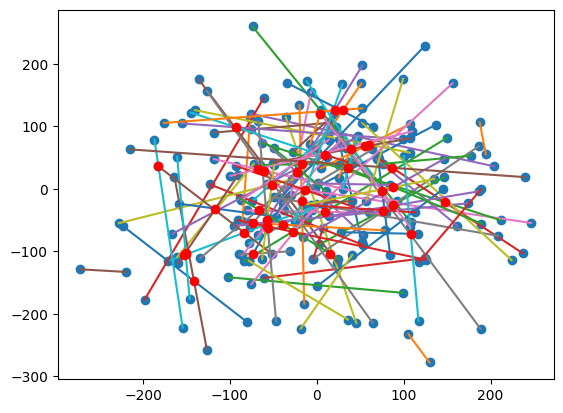

In [219]:
# Test
import matplotlib.pyplot as plt
from random import gauss

p = []
segments = []
n = 100
for i in range(n):
    p.append((gauss(0, n), gauss(0, n)))
    p.append((gauss(0, n), gauss(0, n)))
    segments.append((p[-2], p[-1]))

plt.scatter(*zip(*p))
for segment in segments:
    plt.plot(*zip(*segment))
Q = sc.SortedList()
for s in segments:
    for p in s:
        if p not in Q: Q.add(p)
c = 1
for point in findIntersections(segments):
    plt.plot(point[0],point[1], 'or')
    c += 1

plt.show()

## Problema 6:

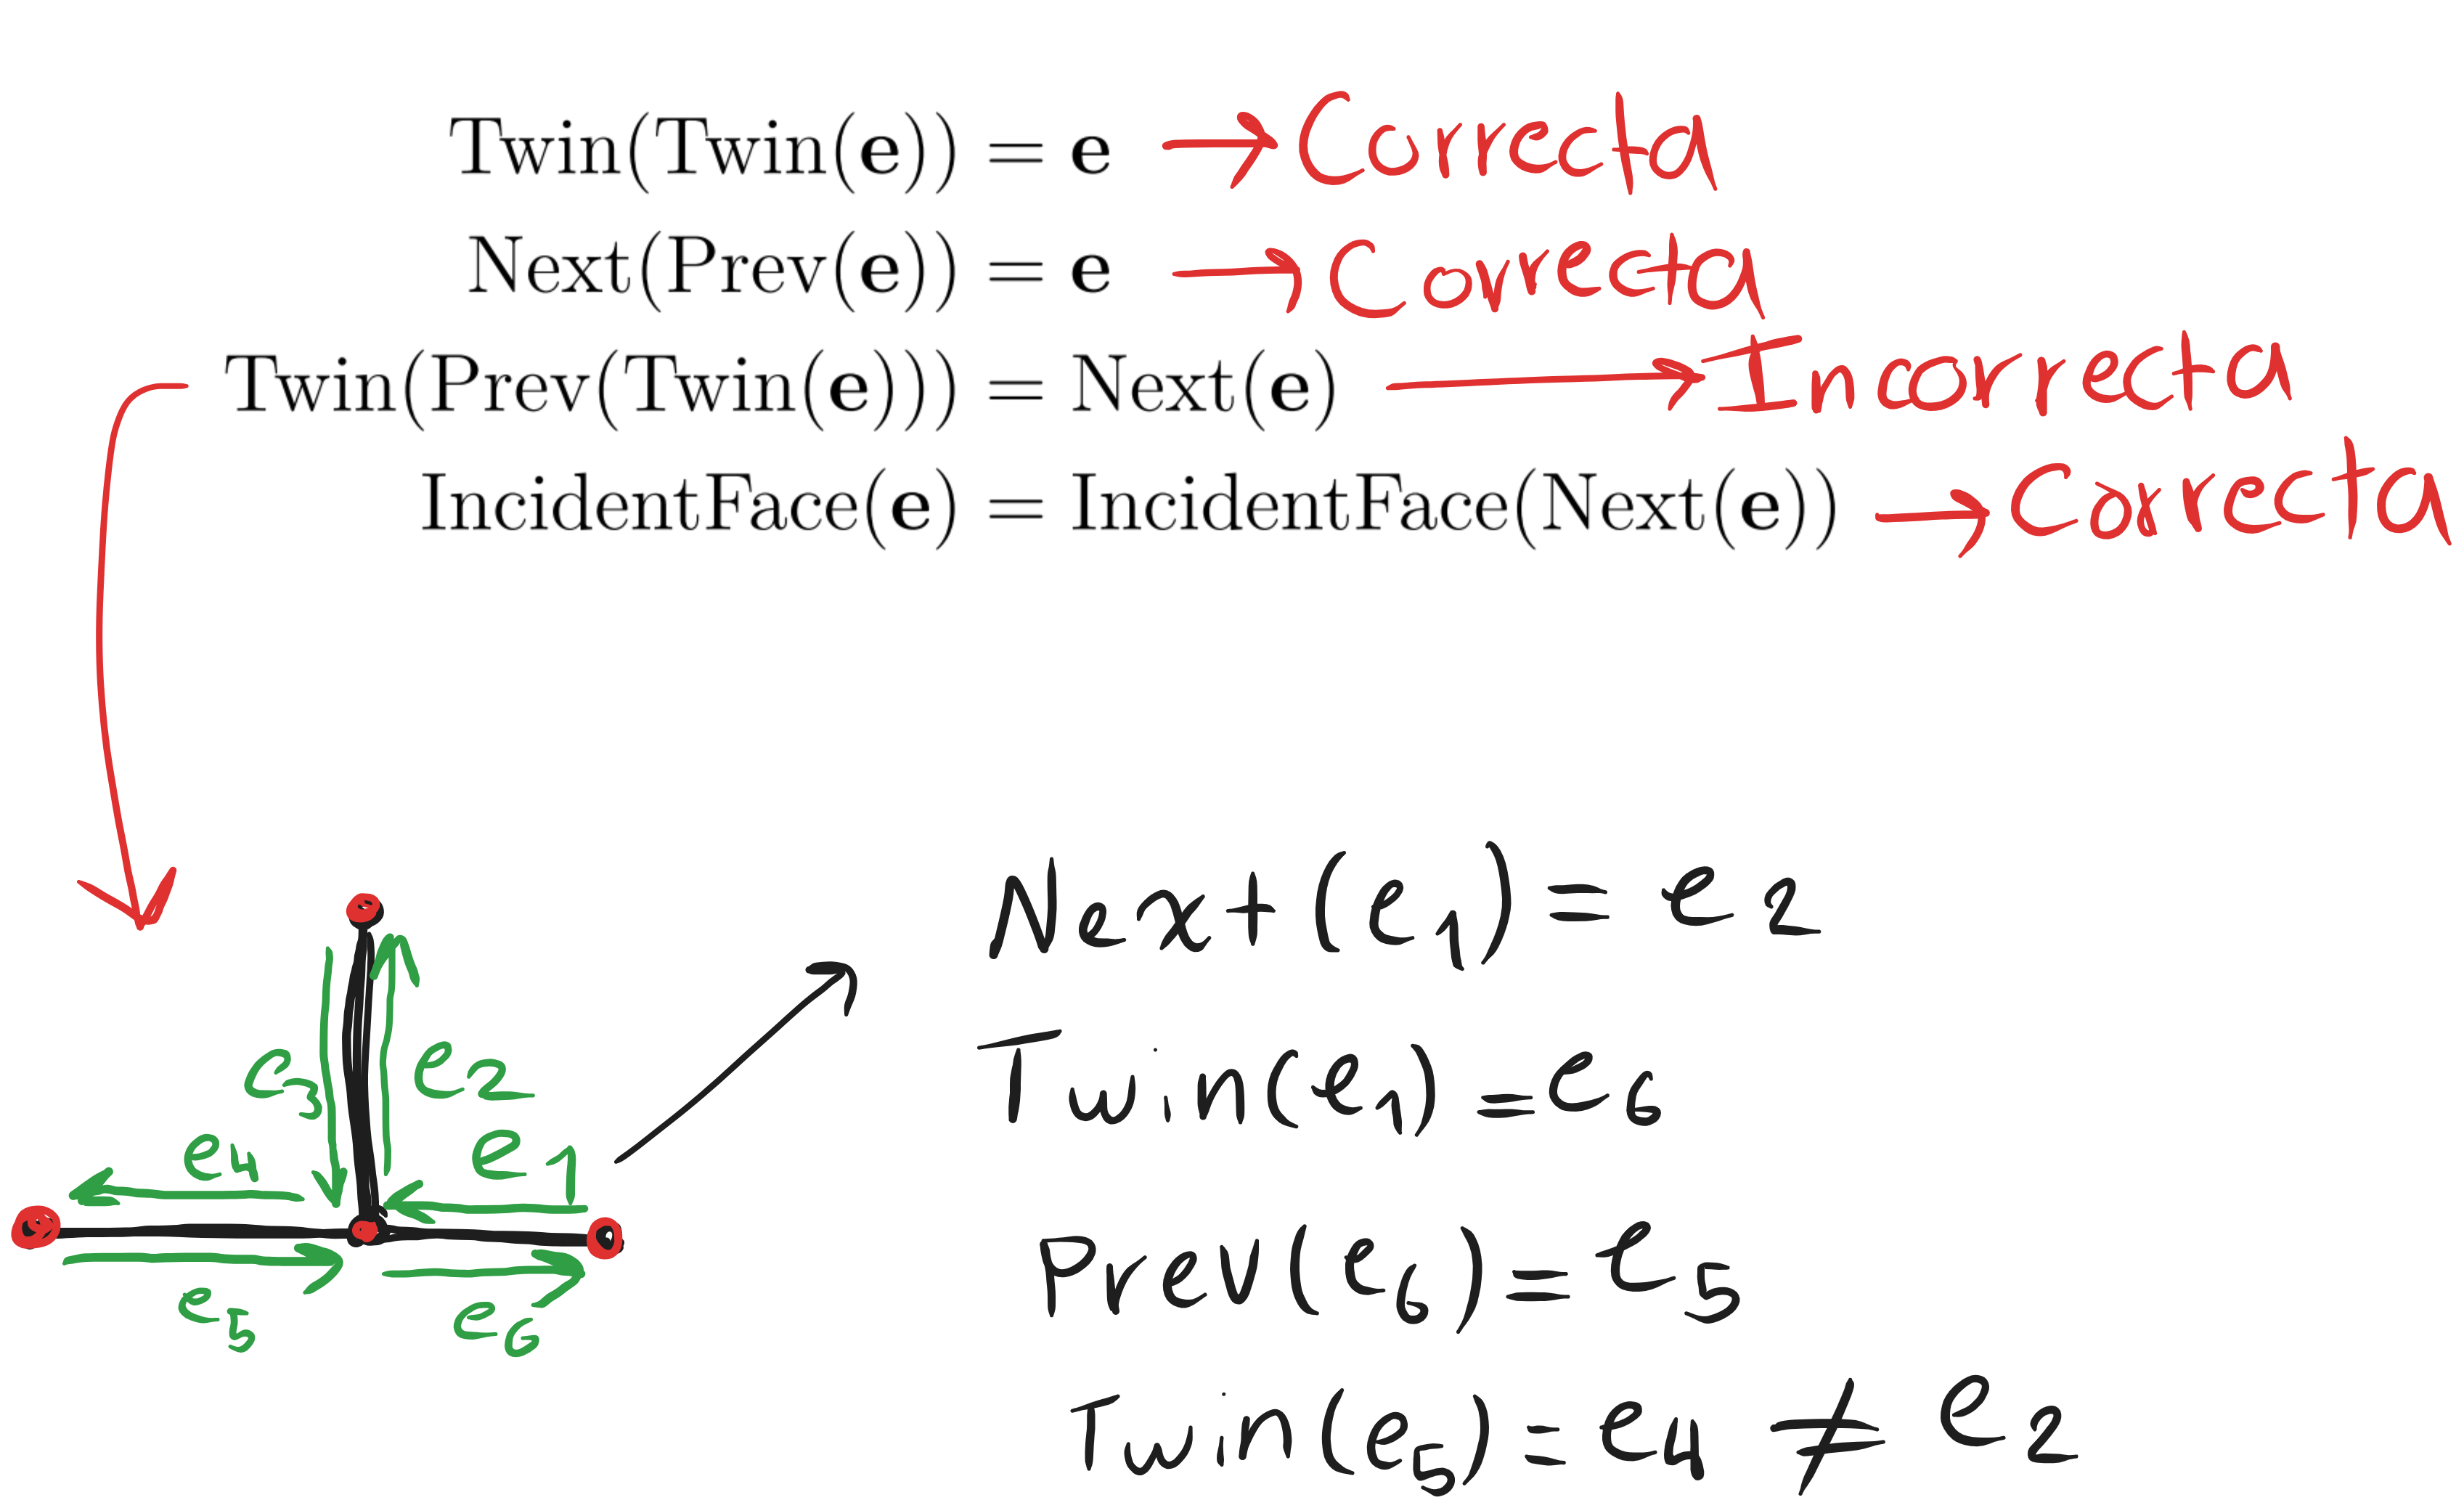